# quiz_06

## Yue Wang - yw3930

### Instructions

Replace the Name and UNI in cell above and the notebook name

Replace all '____' below using the instructions provided.

When completed, 
 - make sure you've replaced Name and UNI in the first cell and filename (eg: week_07_quiz-hw2592)
 - Click the github link shared on canvas for quiz7 to generate your own repository of quiz7
 - Click your own repository of quiz7 to commit your answers to github

In this quiz we will practice creating a train/test split and compare training and test set accuracy of a trained k-Nearest Neighbor model against a baseline.

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
# Load the sample breast_cancer dataset from Scikit-Learn returning just the 
#   X features and y label (instead of the full Bunch data-structure)
#   This is a common binary classification task dataset used for demonstration.
#   For more information, see:
#     https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
X,y = load_breast_cancer(return_X_y=True)

print(f'num_observations: {X.shape[0]}')
print(f'num_features:     {X.shape[1]}')
print(f'classes:          {list(set(y))}')

num_observations: 569
num_features:     30
classes:          [0, 1]


In [3]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split X and y into X_train,X_test,y_train,y_test using train_test_split, 
#    stratify using y, using the default test_size (0.25).
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Check that the distribution of classes is similar in train and test
assert ((y_train == 0).sum() / len(y_train) - 
        (y_test == 0).sum() / len(y_test)) < .01

In [10]:
# Get a baseline 

# Import DummyClassifier from sklearn
from sklearn.dummy import DummyClassifier

#   Instantiate DummyClassifier with strategy="most_frequent"
#      and fit on X_train, y_train
#      store as dummy_c
dummy_c = DummyClassifier(strategy="most_frequent")
dummy_c.fit(X_train, y_train)
# print out the training set accuracy using dummy_c.score()
print(f'dummy training set accuracy: {dummy_c.score(X_train, y_train):0.2f}')

# print out the test set accuracy using dummy_c.score()
print(f'dummy test set accuracy: {dummy_c.score(X_test, y_test):0.2f}')

dummy training set accuracy: 0.63
dummy test set accuracy: 0.63


In [11]:
# Train and compare a K Nearest Neighbors classifier

# Import KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier with n_neighbors=3
#    and train on X_train,y_train
#    store as knn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# print out the training set accuracy using knn.score()
print(f'knn training set accuracy: {knn.score(X_train, y_train):0.2f}')

# print out the test set accuracy using knn.score()
print(f'knn test set accuracy: {knn.score(X_test, y_test):0.2f}')

knn training set accuracy: 0.96
knn test set accuracy: 0.94


In [12]:
# To expose the different kinds of errors that our knn model is making,
#   print a confusion matrix 

# import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# generate a confusion_matrix using using y_test 
#    and the predictions generated by the trained knn model on X_test
#    store as cm
cm = confusion_matrix(y_test, knn.predict(X_test))

print(cm)

[[48  5]
 [ 4 86]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

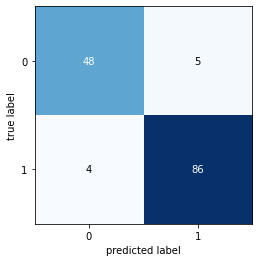

In [14]:
# To help interpret the output of confusion_matrix, 
#    use plot_confusion_matrix from mlxtend

# Import the plot_confusion_matrix function from mlxtend.plotting
from mlxtend.plotting import plot_confusion_matrix

# call plot_confusion_matrix() on the output of 
#   confusion_matrix generated above (cm)
plot_confusion_matrix(conf_mat=cm)